In [1]:
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 14.3 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=27e6e1805b9d1d5b4e6d3f88ce2f8b3276f49a4acfd60cc86c192da75defa2d8
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


In [2]:
import gutenbergpy.textget

In [3]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def obtener_libro(id = 500):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [ ]:
def tokens(txt, idioma = 'english'):
    texto_limpio = re.sub(r'[^\w\s]', '', txt.lower())

    stop_words = set(stopwords.words(idioma))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [ ]:
libro_limpio, libro = obtener_libro()
str_libro = libro_limpio.decode()
list_libro = str_libro.split("\n")
libro_filtrado = list(filter(None, list_libro))
texto_limpio = re.sub(r'[^\w\s]', '', str_libro.lower())
map_libro = list(map(tokens, libro_filtrado))

In [ ]:
tokens = []
for token in map_libro:
    tokens.extend(token)

In [ ]:
lemmatizer = WordNetLemmatizer()
palabras = word_tokenize(texto_limpio)
lemmatized_words = [lemmatizer.lemmatize(palabra) for palabra in palabras]

In [ ]:
df = pd.DataFrame(tokens)
conteo_frecuencias = df.value_counts()
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['token', 'conteo']

<BarContainer object of 10 artists>

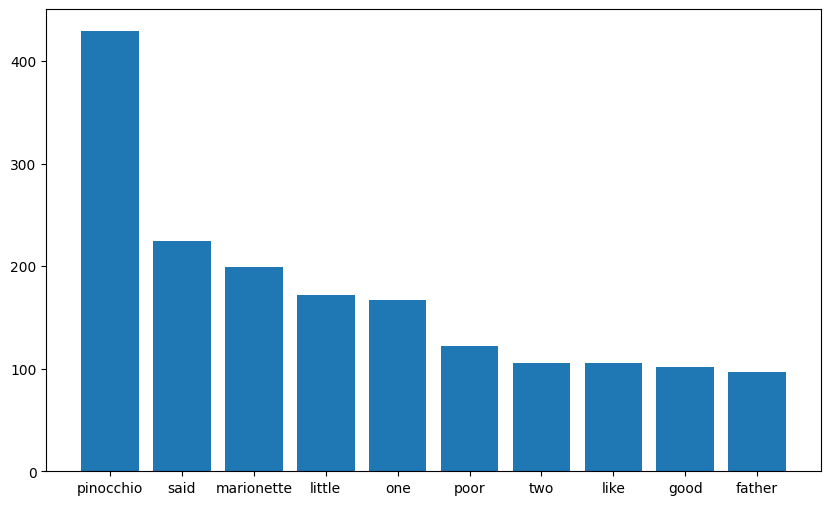

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_frecuencias.iloc[:10].token, df_frecuencias.iloc[:10].conteo)

In [ ]:
wordcloud = WordCloud().generate(' '.join(tokens))

(-0.5, 399.5, 199.5, -0.5)

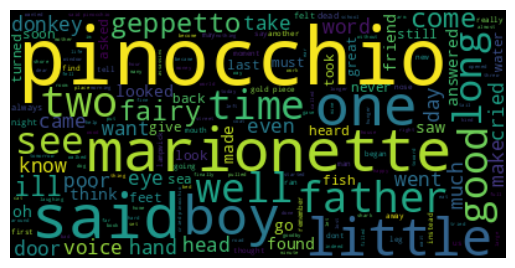

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

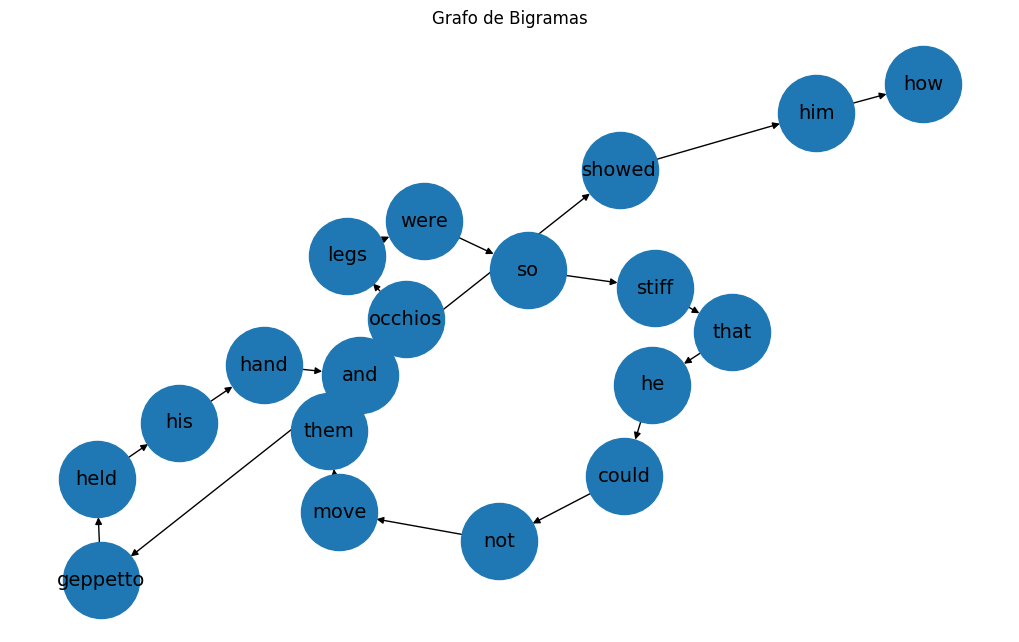

In [ ]:
texto = texto_limpio[10000:10100]
n=2

lsita_bigramas = list(ngrams(texto.split(), n))

G = nx.DiGraph()

for gram in lsita_bigramas:
    G.add_edge(gram[0], gram[1])

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, font_size=14)
plt.title("Grafo de Bigramas")
plt.show()